This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.preprocessing import LabelEncoder

# 1. Data Cleaning, Transformation
df = pd.read_csv('healthcare_dataset.csv')

# List of columns to drop
columns_to_drop = ['Name', 'Date of Admission', 'Discharge Date', 'Room Number']

# Drop unnecessary columns
df = df.drop(columns=columns_to_drop)

df = df.dropna()  # remove missing values

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

# Apply Label Encoding to the specified columns
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # normalize numerical variables

print(df.columns)

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results'],
      dtype='object')


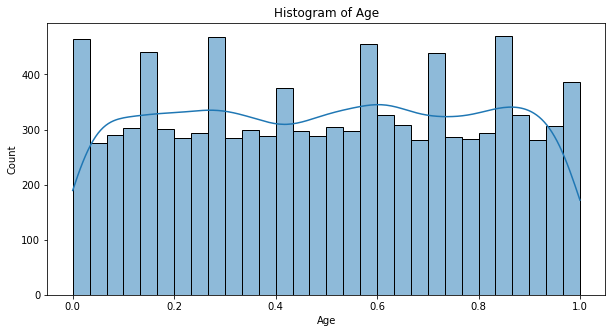

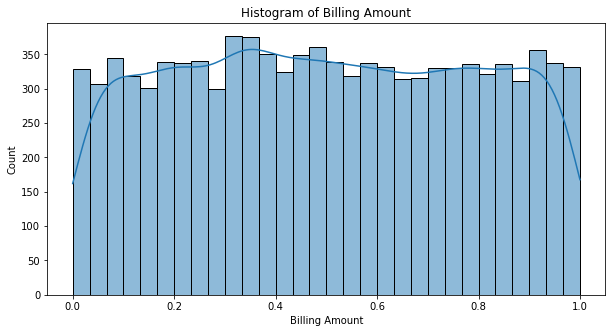

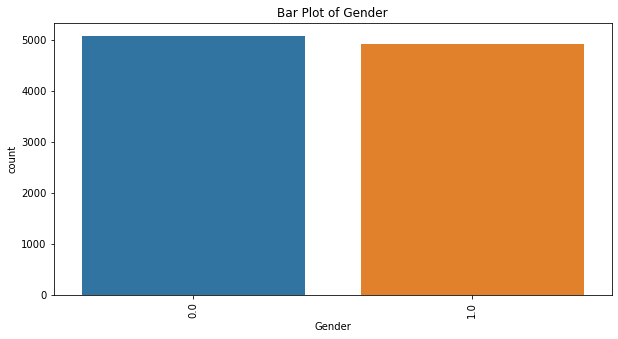

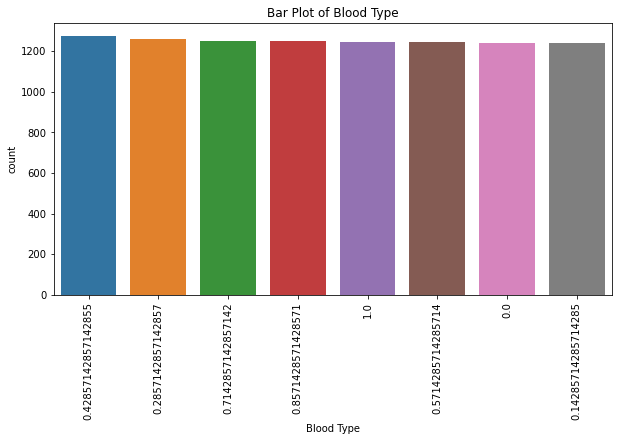

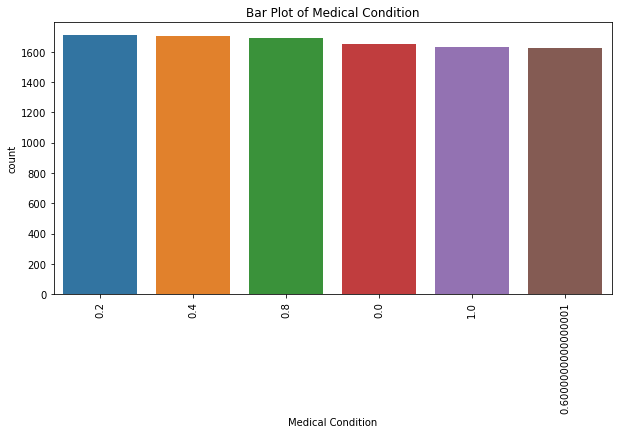

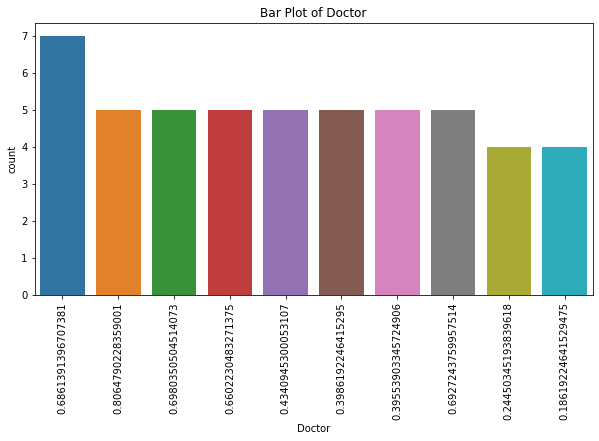

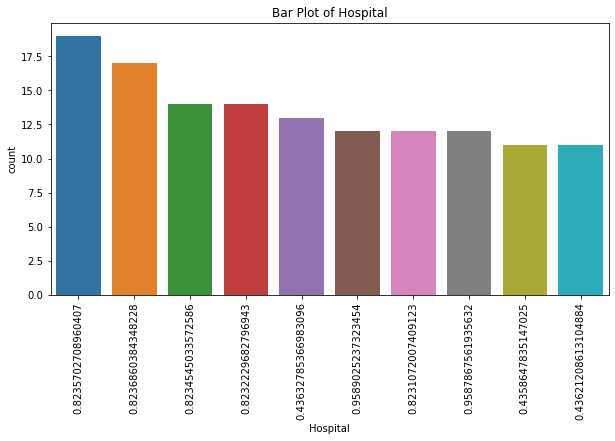

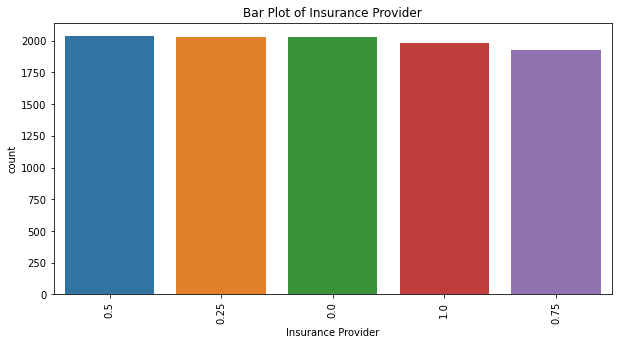

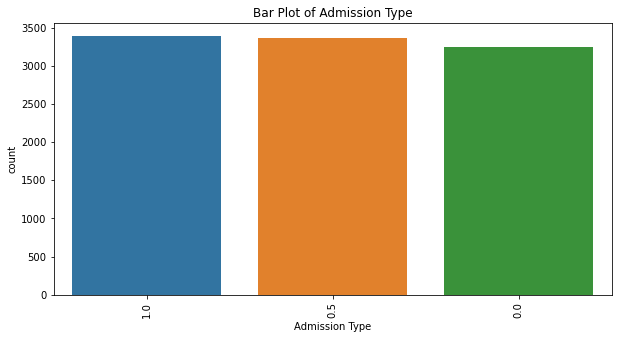

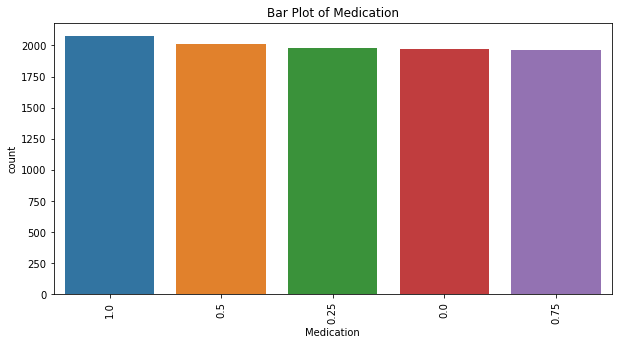

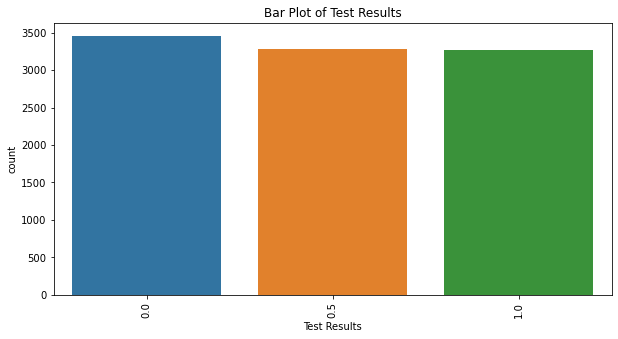

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
numerical_vars = ['Age', 'Billing Amount']

# List of categorical variables
categorical_vars = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

# Plot histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()

# Plot bar plots for the top 10 most frequent categories in each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=df, order=df[var].value_counts().iloc[:10].index)
    plt.title(f'Bar Plot of {var}')
    plt.xticks(rotation=90)
    plt.show()

In [75]:
# 3. Machine Learning Techniques
X = df.drop('Test Results', axis=1)
y = df['Test Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# 4. Use different modelling algorithms to compare results
# Logistic Regression
# Convert the continuous target variable into a binary variable
y_train = [1 if i > y_train.mean() else 0 for i in y_train]
y_test = [1 if i > y_test.mean() else 0 for i in y_test]

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy of Logistic Regression: ', accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.647


In [77]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy of XGBoost: ', accuracy_score(y_test, y_pred))

Accuracy of XGBoost:  0.611


In [78]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of KNN: ', accuracy_score(y_test, y_pred))

Accuracy of KNN:  0.5735
